In [1]:
import pandas as pd 
import mysql.connector
import os
import numpy as np

In [2]:
# os.environ


In [3]:
plotlyapi = os.environ.get('PLOTLYAPI')
plotlyuser = os.environ.get('PLOTLYUSER')
mapbox = os.environ.get('MAPBOX')

In [4]:
conn = mysql.connector.connect(user='root', password='123456', host='127.0.0.1', 
                              database = 'purl_wordpress_to_anonimize')
comments = pd.read_sql('SELECT * from jux0gx_comments', con=conn)


In [5]:
comments.head()


,comment_ID,comment_post_ID,comment_author,comment_author_email,comment_author_url,comment_author_IP,comment_date,comment_date_gmt,comment_content,comment_karma,comment_approved,comment_agent,comment_type,comment_parent,user_id
0,2,23,emily p,,,70.44.66.3,2014-07-24 12:54:46,2014-07-24 12:54:46,These are fantastic! I have been looking for s...,0,1,,,0,0
1,3,23,Lena,lena.mumen@gmail.com,http://www.mrsgarlichead.com,85.1.237.251,2014-07-24 13:24:02,2014-07-24 13:24:02,"Oh these are lovely. I love the tulip hem, I h...",0,1,,,0,0
2,4,23,Katie,,,72.198.169.59,2014-07-24 15:33:46,2014-07-24 15:33:46,Love these shorts!! This may be a silly questi...,0,1,,,0,0
3,5,23,jessica,,,76.114.88.227,2014-07-24 15:46:05,2014-07-24 15:46:05,"so sad, yet another pattern not big enough for...",0,1,,,0,0
4,6,23,"Margo, Thrift at Home",thriftathome@gmail.com,http://thriftathome.blogspot.com,108.55.66.48,2014-07-24 18:19:31,2014-07-24 18:19:31,YES I am done with the gym!!! This year I&#39;...,0,1,,,0,0


In [6]:
# close connection 

conn.close()

In [7]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52845 entries, 0 to 52844
Data columns (total 15 columns):
comment_ID              52845 non-null int64
comment_post_ID         52845 non-null int64
comment_author          52845 non-null object
comment_author_email    52845 non-null object
comment_author_url      52845 non-null object
comment_author_IP       52845 non-null object
comment_date            52704 non-null datetime64[ns]
comment_date_gmt        52698 non-null datetime64[ns]
comment_content         52845 non-null object
comment_karma           52845 non-null int64
comment_approved        52845 non-null object
comment_agent           52845 non-null object
comment_type            52845 non-null object
comment_parent          52845 non-null int64
user_id                 52845 non-null int64
dtypes: datetime64[ns](2), int64(5), object(8)
memory usage: 6.0+ MB


In [8]:
comments['comment_approved'].unique()

array(['1', 'post-trashed', 'trash', '0', 'spam'], dtype=object)

In [9]:
print(comments.groupby('comment_approved').size())

comment_approved
0                  19
1               52363
post-trashed        6
spam              193
trash             264
dtype: int64


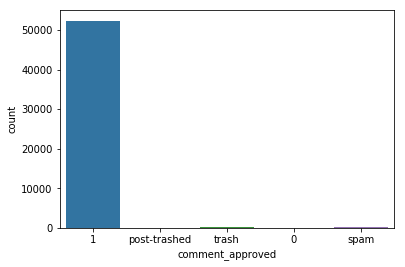

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.countplot(comments['comment_approved'], label='Count')
plt.show()

In [11]:
# Lets visualize missing values:

import missingno as msno


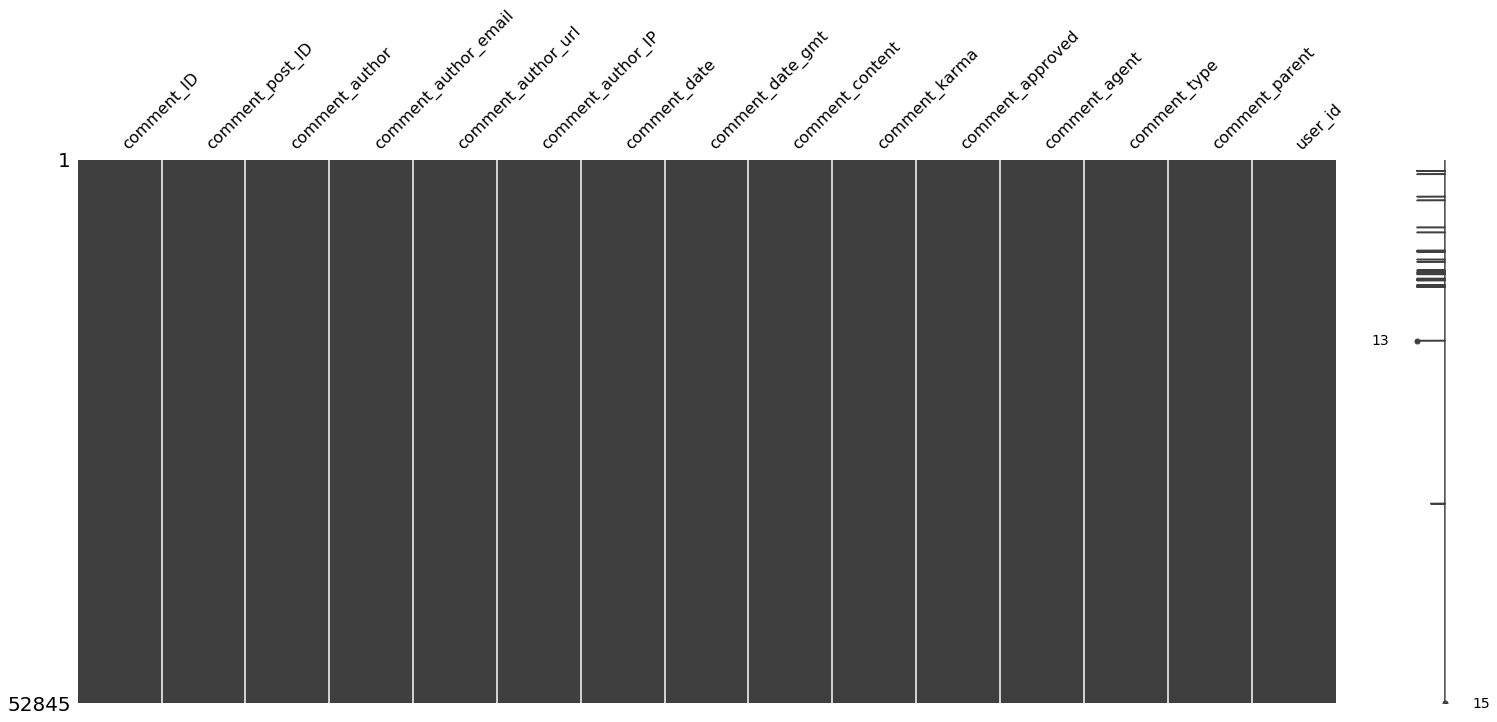

In [12]:
msno.matrix(comments)

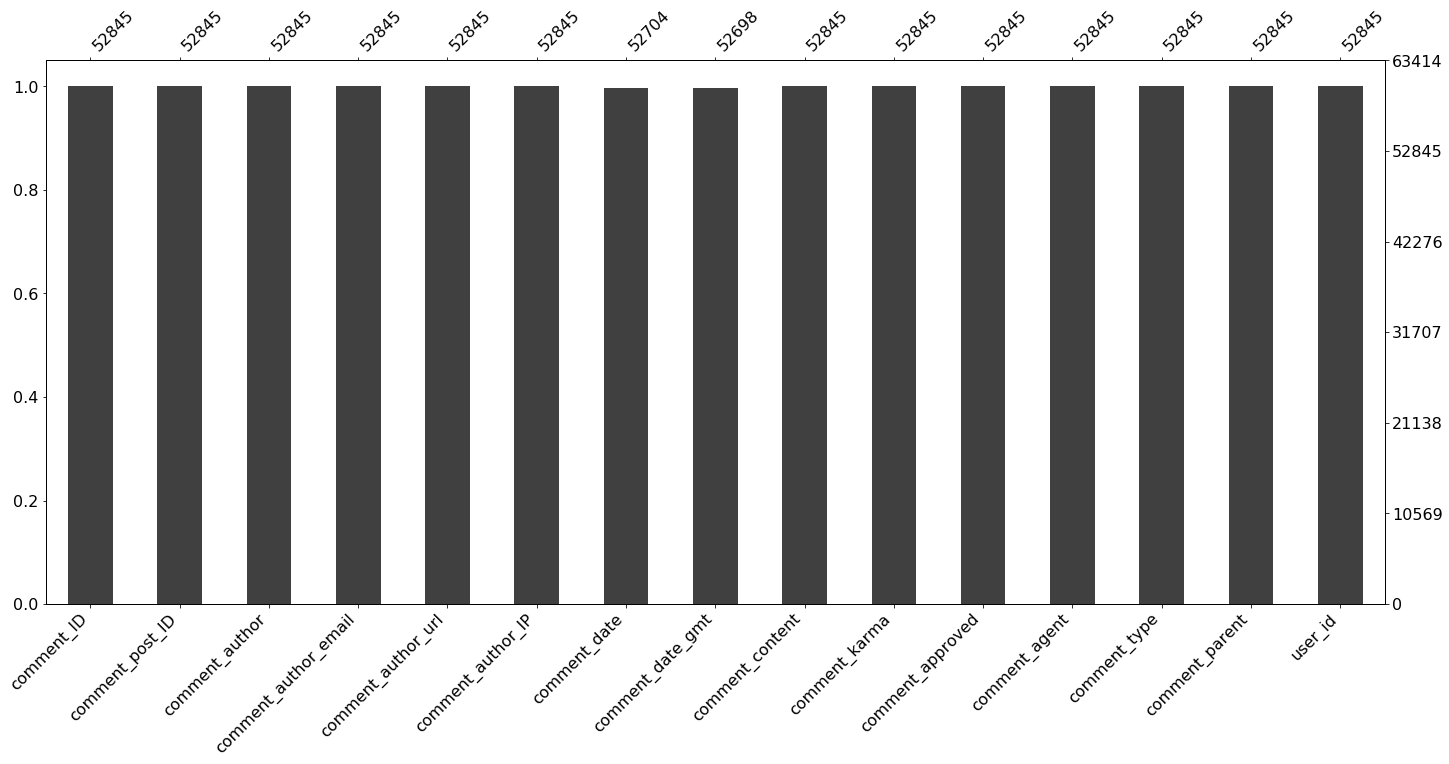

In [13]:
msno.bar(comments)

In [14]:
comments.comment_type.unique()

array(['', 'pingback'], dtype=object)

In [15]:
comments.groupby('comment_type').count()

,comment_ID,comment_post_ID,comment_author,comment_author_email,comment_author_url,comment_author_IP,comment_date,comment_date_gmt,comment_content,comment_karma,comment_approved,comment_agent,comment_parent,user_id
comment_type,,,,,,,,,,,,,,
,52794,52794,52794,52794,52794,52794,52653,52647,52794,52794,52794,52794,52794,52794
pingback,51,51,51,51,51,51,51,51,51,51,51,51,51,51


In [16]:
# find out how many response by purl bee
comments[comments['comment_author'] == 'purl bee'].count()

comment_ID              3913
comment_post_ID         3913
comment_author          3913
comment_author_email    3913
comment_author_url      3913
comment_author_IP       3913
comment_date            3911
comment_date_gmt        3911
comment_content         3913
comment_karma           3913
comment_approved        3913
comment_agent           3913
comment_type            3913
comment_parent          3913
user_id                 3913
dtype: int64

In [17]:
comments.groupby('comment_post_ID').size()

comment_post_ID
0          1
19         4
23       170
43        15
49        59
61        64
89        28
100       21
114       44
130       33
141      224
157       24
163        1
167        8
172       57
194       50
207       19
222       33
249       32
269       44
273       17
286      192
297       11
312       17
320       29
326       17
347       53
384       27
399      289
412       70
        ... 
42623     30
42811      2
42868     38
43238      4
43240     51
43245     12
43304     31
43317     10
43320     11
43358     38
43479     40
43491    138
43531     13
43579      6
43657      2
43660      5
43662     21
44015    146
44089     77
44145      8
44322     43
44344      5
44853     22
45044     36
45122      2
45241      2
45246      1
45327     26
45530      2
45604     12
Length: 1124, dtype: int64

In [18]:
comments.user_id.value_counts()

0     39541
27     2754
32     2312
3      1520
2      1224
26      959
23      907
21      733
36      564
6       464
15      409
19      399
8       371
7       242
37      140
40      114
33       57
31       53
28       46
5        32
14        4
Name: user_id, dtype: int64

In [19]:
# lets drop columns we don't need
columns = ['comment_karma', 'comment_agent', 'comment_type', 'comment_parent', 'user_id']
cleaned_comments = comments.drop(columns, axis=1)

In [20]:
# get rid of spam comments
spam = ['0', 'post-trashed', 'spam', 'trash']
cleaned_comments = cleaned_comments[cleaned_comments.comment_approved != '0']


In [21]:
cleaned_comments = cleaned_comments[cleaned_comments.comment_approved != 'post-trashed']


In [22]:
cleaned_comments = cleaned_comments[cleaned_comments.comment_approved != 'spam']


In [23]:
cleaned_comments = cleaned_comments[cleaned_comments.comment_approved != 'trash']


In [24]:
cleaned_comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52363 entries, 0 to 52829
Data columns (total 10 columns):
comment_ID              52363 non-null int64
comment_post_ID         52363 non-null int64
comment_author          52363 non-null object
comment_author_email    52363 non-null object
comment_author_url      52363 non-null object
comment_author_IP       52363 non-null object
comment_date            52222 non-null datetime64[ns]
comment_date_gmt        52216 non-null datetime64[ns]
comment_content         52363 non-null object
comment_approved        52363 non-null object
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 4.4+ MB


In [25]:
cleaned_comments.head()

,comment_ID,comment_post_ID,comment_author,comment_author_email,comment_author_url,comment_author_IP,comment_date,comment_date_gmt,comment_content,comment_approved
0,2,23,emily p,,,70.44.66.3,2014-07-24 12:54:46,2014-07-24 12:54:46,These are fantastic! I have been looking for s...,1
1,3,23,Lena,lena.mumen@gmail.com,http://www.mrsgarlichead.com,85.1.237.251,2014-07-24 13:24:02,2014-07-24 13:24:02,"Oh these are lovely. I love the tulip hem, I h...",1
2,4,23,Katie,,,72.198.169.59,2014-07-24 15:33:46,2014-07-24 15:33:46,Love these shorts!! This may be a silly questi...,1
3,5,23,jessica,,,76.114.88.227,2014-07-24 15:46:05,2014-07-24 15:46:05,"so sad, yet another pattern not big enough for...",1
4,6,23,"Margo, Thrift at Home",thriftathome@gmail.com,http://thriftathome.blogspot.com,108.55.66.48,2014-07-24 18:19:31,2014-07-24 18:19:31,YES I am done with the gym!!! This year I&#39;...,1


In [26]:
cleaned_comments.comment_approved.unique()

array(['1'], dtype=object)

In [129]:
# lets removed rows that contain response to each of the comments: 

comment_wo_response = cleaned_comments[cleaned_comments.comment_author != 'purl bee']

In [130]:
comment_wo_response.count()

comment_ID              48450
comment_post_ID         48450
comment_author          48450
comment_author_email    48450
comment_author_url      48450
comment_author_IP       48450
comment_date            48311
comment_date_gmt        48305
comment_content         48450
comment_approved        48450
dtype: int64

In [131]:
comment_wo_response.comment_author.value_counts().head()

Cassy     2756
Adam      2312
Molly     1550
Laura     1413
Kumeko     959
Name: comment_author, dtype: int64

In [133]:
comment_wo_response[comment_wo_response['comment_author'] == 'Cassy'].head(10)

,comment_ID,comment_post_ID,comment_author,comment_author_email,comment_author_url,comment_author_IP,comment_date,comment_date_gmt,comment_content,comment_approved
1693,1703,1141,Cassy,cassandra.dominick@gmail.com,http://knitthehellout.com,130.184.236.182,2013-10-08 15:24:56,2013-10-08 15:24:56,Ha! I was one of those early people.When I enc...,1
16147,16439,6145,Cassy,,,,2011-04-16 00:00:00,2011-04-16 00:00:00,Thank you for this cute pattern. Here is the f...,1
35674,90513,746,Cassy,Cassy.guthrie@gmail.com,,166.137.136.49,2016-01-16 00:28:24,2016-01-16 05:28:24,I am in the middle of making this hat for my n...,1
35704,90562,19172,Cassy,cassy@purlsoho.com,,69.126.52.97,2016-01-17 19:15:57,2016-01-18 00:15:57,"Hi Mary Anne,\n\nWe'd be happy to help you mak...",1
35706,90564,27563,Cassy,cassy@purlsoho.com,,69.126.52.97,2016-01-17 21:14:05,2016-01-18 02:14:05,"Hi Billie,\n\nThank you for writing in! We do ...",1
35736,90605,709,Cassy,cassy@purlsoho.com,,69.126.52.97,2016-01-18 17:41:08,2016-01-18 22:41:08,"Hi Elizabeth,\n\nThanks for writing in. If you...",1
35738,90607,20978,Cassy,cassy@purlsoho.com,,69.126.52.97,2016-01-18 17:58:35,2016-01-18 22:58:35,"Hi Irene,\n\nThanks for writing in! We are hap...",1
35739,90608,1107,Cassy,cassy@purlsoho.com,,69.126.52.97,2016-01-18 18:16:17,2016-01-18 23:16:17,"Hi Margo,\n\nThanks for your question! We carr...",1
35740,90610,15348,Cassy,cassy@purlsoho.com,,69.126.52.97,2016-01-18 18:21:52,2016-01-18 23:21:52,"Hi Claudia,\n\nThanks for writing in! We do h...",1
35741,90612,2865,Cassy,cassy@purlsoho.com,,69.126.52.97,2016-01-18 18:32:26,2016-01-18 23:32:26,"Hi Kassy,\n\nThanks for writing in! For this ...",1


In [134]:
# not all comments response have purl bee, need to get rid off comment 
# author email that has @purlsoho.com

comment_wo_response = comment_wo_response[comment_wo_response['comment_author_email'].str.contains("@purlsoho.com")==False]

In [135]:
comment_wo_response.head()

,comment_ID,comment_post_ID,comment_author,comment_author_email,comment_author_url,comment_author_IP,comment_date,comment_date_gmt,comment_content,comment_approved
0,2,23,emily p,,,70.44.66.3,2014-07-24 12:54:46,2014-07-24 12:54:46,These are fantastic! I have been looking for s...,1
1,3,23,Lena,lena.mumen@gmail.com,http://www.mrsgarlichead.com,85.1.237.251,2014-07-24 13:24:02,2014-07-24 13:24:02,"Oh these are lovely. I love the tulip hem, I h...",1
2,4,23,Katie,,,72.198.169.59,2014-07-24 15:33:46,2014-07-24 15:33:46,Love these shorts!! This may be a silly questi...,1
3,5,23,jessica,,,76.114.88.227,2014-07-24 15:46:05,2014-07-24 15:46:05,"so sad, yet another pattern not big enough for...",1
4,6,23,"Margo, Thrift at Home",thriftathome@gmail.com,http://thriftathome.blogspot.com,108.55.66.48,2014-07-24 18:19:31,2014-07-24 18:19:31,YES I am done with the gym!!! This year I&#39;...,1


In [136]:
comment_wo_response.comment_author.value_counts().head()

Sarah    305
Lisa     205
Laura    189
Susan    188
Karen    171
Name: comment_author, dtype: int64

In [137]:
comment_wo_response[comment_wo_response['comment_author'] == 'Sarah'].head()

,comment_ID,comment_post_ID,comment_author,comment_author_email,comment_author_url,comment_author_IP,comment_date,comment_date_gmt,comment_content,comment_approved
175,177,172,Sarah,Sarahvheath@gmail.com,,99.246.176.139,2014-06-14 02:39:00,2014-06-14 02:39:00,Just made one tonight and there will definitel...,1
291,294,286,Sarah,sarahphilip@runbox.com,,24.193.100.246,2014-05-22 20:57:34,2014-05-22 20:57:34,Can I slip the first knit stitch for a cleaner...,1
294,297,286,Sarah,S.seago@me.com,,24.8.144.188,2014-05-22 23:55:43,2014-05-22 23:55:43,Is there a reason that you used the Addi Rocke...,1
314,317,286,Sarah,S.seago@me.com,,24.8.144.188,2014-07-04 03:07:14,2014-07-04 03:07:14,I&#39;ve been trying to get this project going...,1
751,759,647,Sarah,sarahwjagger@gmail.com,http://www.goingstarfishing.blogspot.com,72.200.155.202,2014-03-22 14:20:12,2014-03-22 14:20:12,"Hi Corinne,<br/><br/>Wondering- do you have an...",1


In [138]:
comment_wo_response[comment_wo_response['comment_author_email'].str.contains('@purl')]

,comment_ID,comment_post_ID,comment_author,comment_author_email,comment_author_url,comment_author_IP,comment_date,comment_date_gmt,comment_content,comment_approved


In [139]:
comment_wo_response.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35099 entries, 0 to 52817
Data columns (total 10 columns):
comment_ID              35099 non-null int64
comment_post_ID         35099 non-null int64
comment_author          35099 non-null object
comment_author_email    35099 non-null object
comment_author_url      35099 non-null object
comment_author_IP       35099 non-null object
comment_date            34960 non-null datetime64[ns]
comment_date_gmt        34958 non-null datetime64[ns]
comment_content         35099 non-null object
comment_approved        35099 non-null object
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 2.9+ MB


In [140]:
# find positive and Negative Comments:

import nltk

def format_comment(comment):
    return ({word: True for word in nltk.word_tokenize(comment)})

print(format_comment('These are fantastic! I have been looking for something like this to use my herring bone chambray and pajama shorts too ! Thank you!'))
print(format_comment('so sad, yet another pattern not big enough for this fat girl :('))

{'These': True, 'are': True, 'fantastic': True, '!': True, 'I': True, 'have': True, 'been': True, 'looking': True, 'for': True, 'something': True, 'like': True, 'this': True, 'to': True, 'use': True, 'my': True, 'herring': True, 'bone': True, 'chambray': True, 'and': True, 'pajama': True, 'shorts': True, 'too': True, 'Thank': True, 'you': True}
{'so': True, 'sad': True, ',': True, 'yet': True, 'another': True, 'pattern': True, 'not': True, 'big': True, 'enough': True, 'for': True, 'this': True, 'fat': True, 'girl': True, ':': True, '(': True}


In [141]:
# pos = []
# content = comment_wo_response.comment_content
# for i in content:
#     pos.append([format_comment(i), 'pos'])

In [142]:
# neg = []
# content = comment_wo_response.comment_content
# for i in content:
#     neg.append([format_comment(i), 'neg'])

In [143]:
# training = pos[:int((.8)*len(pos))] + neg[:int((.8)*len(neg))]
# test = pos[int((.8)*len(pos)):] + neg[int((.8)*len(neg)):]

In [144]:
# from nltk.classify import NaiveBayesClassifier

# classifier = NaiveBayesClassifier.train(training)

In [145]:
# classifier.show_most_informative_features()

In [146]:
# example1 = "Cats are awesome!"
 
# print(classifier.classify(format_comment(example1)))

In [147]:
# example2 = 'so sad, yet another pattern not big enough for this fat girl :('
 
# print(classifier.classify(format_comment(example2)))

In [148]:
# example3 = "I have no headache!"
 
# print(classifier.classify(format_comment(example3)))

In [149]:
# from nltk.classify.util import accuracy
# print(accuracy(classifier, test))

In [150]:
alienclient = os.environ.get('ALIENCLIENT')
alienapi = os.environ.get('ALIEAPIKEY')

In [151]:
# using Aylie sentiment

from aylienapiclient import textapi

client = textapi.Client(alienclient, alienapi)

In [152]:
text = 'These are fantastic! I have been looking for something like this to use my herring bone chambray and pajama shorts too ! Thank you!'
sentiment = client.Sentiment({'text': text})
print(sentiment)

{'polarity': 'positive', 'subjectivity': 'subjective', 'text': 'These are fantastic! I have been looking for something like this to use my herring bone chambray and pajama shorts too ! Thank you!', 'polarity_confidence': 0.9783152341842651, 'subjectivity_confidence': 1.0}


In [153]:
text = comment_wo_response['comment_content'][3:4].values
sentiment = client.Sentiment({'text':text})


In [154]:
sentiment.values()

dict_values(['negative', 'subjective', "['so sad, yet another pattern not big enough for this fat girl :(']", 0.9630195498466492, 0.9999999999999851])

In [155]:
sentiment['polarity']

'negative'

In [156]:
print(dir(comment_wo_response['comment_content'][0]))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [157]:
# create df with sentiment dictionary

text = comment_wo_response['comment_content']
sentiment = client.Sentiment({'text':text})

In [158]:
sentiment.values()

dict_values(['positive', 'subjective', "0        These are fantastic! I have been looking for s...\n1        Oh these are lovely. I love the tulip hem, I h...\n2        Love these shorts!! This may be a silly questi...\n3        so sad, yet another pattern not big enough for...\n4        YES I am done with the gym!!! This year I&#39;...\n6        Thanks for the pattern, I can&#39;t wait to ma...\n7        This are so fantastic!  I want to make ten pai...\n8        This is exactly the shorts pattern I have been...\n9        That is so nice of you to Molly to reply to Je...\n10       Ooo, another pattern added to my to-do list :)...\n11       These shorts are fabulous.  I would love to ma...\n12       Question! I have some pre-made bias tape I&#39...\n15       These are fabulous. Great styling and great us...\n16       Thanks so much for sharing this! Totally makin...\n18       Thank you, thank you for doing this as a patte...\n19       This is so exciting! So glad the pattern is av...\n

In [159]:
def alyien_text(value):
    text = value
    sentiment = client.Sentiment({'text':text})
    return sentiment
    

In [160]:
# try to see how many request we can make
value = comment_wo_response.comment_content.values
comment_wo_response['alyien_analysis'] = comment_wo_response.apply(alyien_text, axis=1)

HttpError: <HttpError 429 when requesting https://api.aylien.com/api/v1/sentiment returned "">

In [161]:
# will use textblob instead for sentiment analysis
from textblob import TextBlob
import re

comment = comment_wo_response.comment_content

def clean_comment(comment):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(<[^>]*>)|(<br/>)|[\n\!\@\#\$\%\^\&\*\(\)\[\]\
           {\}\;\:\,\.\/\?\|\`\_\\+\\\=\~\-\<\>]", " ", comment).split())

def sentiment_analysis(comment):
    analysis = TextBlob(clean_comment(comment))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


In [162]:
comment_wo_response['Sentiment'] = np.array([sentiment_analysis(comment) for comment in comment_wo_response.comment_content])

In [163]:
comment_wo_response.Sentiment.value_counts()

 1    28275
-1     3771
 0     3053
Name: Sentiment, dtype: int64

In [164]:
# find the true polarity value
comment = comment_wo_response.comment_content

def clean_comment(comment):
    return ' '.join(re.sub("r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(<[^>]*>)|(<br/>)|[\n\!\@\#\$\%\^\&\*\(\)\[\]\
           {\}\;\:\,\.\/\?\|\`\_\\+\\\=\~\-\<\>]", " ", comment).split())

def sentiment_analysis(comment):
    analysis = TextBlob(clean_comment(comment))
    return analysis.sentiment.polarity
    


In [265]:
comment

0        These are fantastic! I have been looking for s...
1        Oh these are lovely. I love the tulip hem, I h...
2        Love these shorts!! This may be a silly questi...
3        so sad, yet another pattern not big enough for...
4        YES I am done with the gym!!! This year I&#39;...
6        Thanks for the pattern, I can&#39;t wait to ma...
7        This are so fantastic!  I want to make ten pai...
8        This is exactly the shorts pattern I have been...
9        That is so nice of you to Molly to reply to Je...
10       Ooo, another pattern added to my to-do list :)...
11       These shorts are fabulous.  I would love to ma...
12       Question! I have some pre-made bias tape I&#39...
15       These are fabulous. Great styling and great us...
16       Thanks so much for sharing this! Totally makin...
18       Thank you, thank you for doing this as a patte...
19       This is so exciting! So glad the pattern is av...
20       How do the ornaments attach to the tree? The k.

In [165]:
comment_wo_response['Sentiment_values'] = np.array([sentiment_analysis(comment) for comment in comment_wo_response.comment_content])

In [166]:
comment_wo_response.head(10)

,comment_ID,comment_post_ID,comment_author,comment_author_email,comment_author_url,comment_author_IP,comment_date,comment_date_gmt,comment_content,comment_approved,Sentiment,Sentiment_values
0,2,23,emily p,,,70.44.66.3,2014-07-24 12:54:46,2014-07-24 12:54:46,These are fantastic! I have been looking for s...,1,1,0.400000
1,3,23,Lena,lena.mumen@gmail.com,http://www.mrsgarlichead.com,85.1.237.251,2014-07-24 13:24:02,2014-07-24 13:24:02,"Oh these are lovely. I love the tulip hem, I h...",1,1,0.375000
2,4,23,Katie,,,72.198.169.59,2014-07-24 15:33:46,2014-07-24 15:33:46,Love these shorts!! This may be a silly questi...,1,1,0.166667
3,5,23,jessica,,,76.114.88.227,2014-07-24 15:46:05,2014-07-24 15:46:05,"so sad, yet another pattern not big enough for...",1,-1,-0.166667
4,6,23,"Margo, Thrift at Home",thriftathome@gmail.com,http://thriftathome.blogspot.com,108.55.66.48,2014-07-24 18:19:31,2014-07-24 18:19:31,YES I am done with the gym!!! This year I&#39;...,1,0,0.000000
6,8,23,Tina,,http://othersideofthepom.blogspot.com,129.85.144.49,2014-07-24 22:34:55,2014-07-24 22:34:55,"Thanks for the pattern, I can&#39;t wait to ma...",1,1,0.333333
7,9,23,CW,clarawey@ptd.net,,24.102.229.143,2014-07-24 23:05:08,2014-07-24 23:05:08,This are so fantastic! I want to make ten pai...,1,1,0.085714
8,10,23,Cyrena,,,70.67.140.53,2014-07-24 23:58:47,2014-07-24 23:58:47,This is exactly the shorts pattern I have been...,1,1,0.412500
9,11,23,Cheryl,,,99.247.66.91,2014-07-24 23:59:00,2014-07-25 03:59:00,That is so nice of you to Molly to reply to Je...,1,1,0.527500
10,12,23,Ashley,ad.drudge@gmail.com,http://evergreenliving.ca,209.197.161.101,2014-07-25 01:31:48,2014-07-25 05:31:48,"Ooo, another pattern added to my to-do list :)...",1,1,0.200000


In [167]:
comment_wo_response.Sentiment_values.describe()

count    35099.000000
mean         0.233644
std          0.234337
min         -1.000000
25%          0.058333
50%          0.209524
75%          0.380000
max          1.000000
Name: Sentiment_values, dtype: float64

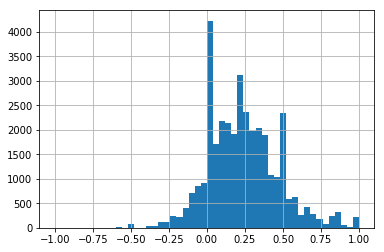

In [169]:
# plotting distribution sentiment for each comment
comment_wo_response.Sentiment_values.hist(bins=50)

In [170]:
# find the average length of each comment
mean = np.mean(comment_wo_response.comment_content.str.len())

In [171]:
print("The length's average for each comment: {}".format(mean))

The length's average for each comment: 207.48408786575115


In [172]:
dist = comment_wo_response.comment_content.describe()

In [173]:
print('The distribution is: {}'.format(dist))

The distribution is: count          35099
unique         34785
top       Thank you!
freq              37
Name: comment_content, dtype: object


In [174]:
# word cloud: 

import matplotlib.pyplot as plt
% matplotlib inline
from wordcloud import WordCloud, STOPWORDS

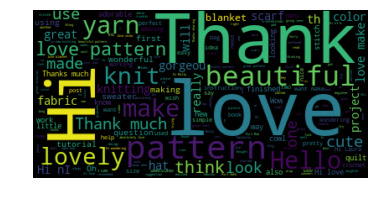

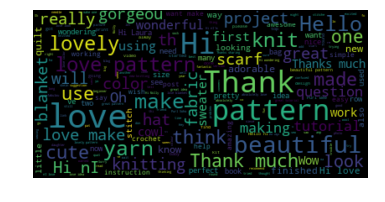

In [175]:
data = comment.to_string()

stopwords = set(STOPWORDS)
stopwords.add("br")

wordcloud = WordCloud(stopwords=stopwords).generate(data)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

wordcloud = WordCloud(max_font_size=40, stopwords=stopwords).generate(data)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [176]:
comment_wo_response.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35099 entries, 0 to 52817
Data columns (total 12 columns):
comment_ID              35099 non-null int64
comment_post_ID         35099 non-null int64
comment_author          35099 non-null object
comment_author_email    35099 non-null object
comment_author_url      35099 non-null object
comment_author_IP       35099 non-null object
comment_date            34960 non-null datetime64[ns]
comment_date_gmt        34958 non-null datetime64[ns]
comment_content         35099 non-null object
comment_approved        35099 non-null object
Sentiment               35099 non-null int64
Sentiment_values        35099 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 4.7+ MB


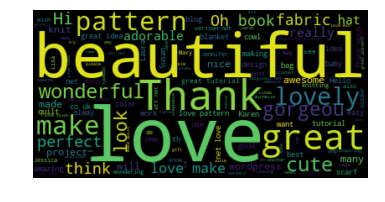

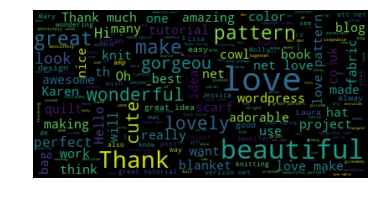

In [187]:
# word cloud for positvie and negative sentiments

# positive  

data = comment_wo_response[comment_wo_response['Sentiment_values'] >= 0.5].to_string()

stopwords = set(STOPWORDS)
stopwords.add('gmail')
stopwords.add('br')
stopwords.add('yahoo')
stopwords.add('comcast')
stopwords.add('hotmail')
stopwords.add('blogspot')
stopwords.add("aol")



wordcloud = WordCloud(stopwords=stopwords).generate(data)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

wordcloud = WordCloud(max_font_size=40, stopwords=stopwords).generate(data)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

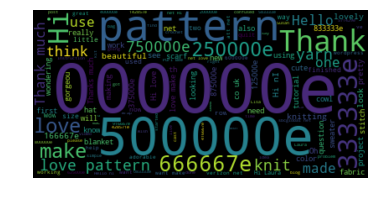

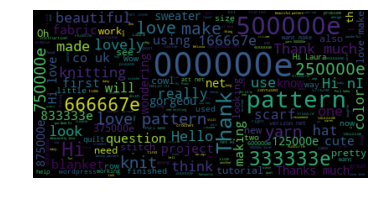

In [188]:
# negative
# but need to keep working on this

data = comment_wo_response[comment_wo_response['Sentiment_values'] < 0.4].to_string()

stopwords = set(STOPWORDS)
stopwords.add('gmail')
stopwords.add('br')
stopwords.add('yahoo')
stopwords.add('comcast')
stopwords.add('hotmail')
stopwords.add('blogspot')
stopwords.add("aol")



wordcloud = WordCloud(stopwords=stopwords).generate(data)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

wordcloud = WordCloud(max_font_size=40, stopwords=stopwords).generate(data)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [189]:
unique_email = comment_wo_response.comment_author_email.unique()

In [190]:
unique_ip = comment_wo_response.comment_author_IP.unique()

In [197]:
unique_ip.view()

array(['70.44.66.3', '85.1.237.251', '72.198.169.59', ...,
       '2601:41:c101:4832:d1b3:5f2c:59af:6d4d', '146.115.246.251',
       '71.205.201.30'], dtype=object)

In [191]:
!pwd

/Users/tomasespina/Purl


In [198]:
import pygeoip

gi = pygeoip.GeoIP('GeoIP.dat')

In [199]:
gi.country_name_by_addr('2601:41:c101:4832')

GeoIPError: Invalid database type; this database supports IPv4 addresses, not IPv6

In [79]:
gic = pygeoip.GeoIP('GeoLiteCity.dat')
gic.record_by_addr('70.44.66.3')

{'area_code': 610,
 'city': 'Lehighton',
 'continent': 'NA',
 'country_code': 'US',
 'country_code3': 'USA',
 'country_name': 'United States',
 'dma_code': 577,
 'latitude': 40.79990000000001,
 'longitude': -75.7339,
 'metro_code': 'Wilkes Barre-Scranton, PA',
 'postal_code': '18235',
 'region_code': 'PA',
 'time_zone': 'America/New_York'}

In [200]:
gic = pygeoip.GeoIP('GeoLiteCity.dat')
gic.record_by_addr('127.0.0.1')


In [201]:
unique_ip = list(filter(None, unique_ip))


In [203]:
# we have get rid off empty ip address and IPv6 as it is not supported and would throw an error
cleaned_ipv4 = [i for i in unique_ip if ':' not in i]

In [212]:
cleaned_ipv4[:10]

['70.44.66.3',
 '85.1.237.251',
 '72.198.169.59',
 '76.114.88.227',
 '108.55.66.48',
 '129.85.144.49',
 '24.102.229.143',
 '70.67.140.53',
 '99.247.66.91',
 '209.197.161.101']

In [213]:
cleaned_ipv4 = [i for i in unique_ip if 'unknown' not in i]

In [214]:
cleaned_ipv4[17536]

'72.28.211.128'

In [215]:
ipv4_df = pd.DataFrame()
count = 0
# trying to find out where the error is
for i in cleaned_ipv4:
    count += 1
    ip = pd.DataFrame(gic.record_by_addr(i), index=[i])
    ipv4_df = ipv4_df.append(ip)

In [216]:
count


24923

In [266]:
ipv4_df.head()

,area_code,city,country_code,country_name,latitude,longitude,metro_code,postal_code,region_code,time_zone
70.44.66.3,610.0,Lehighton,US,United States,40.7999,-75.7339,"Wilkes Barre-Scranton, PA",18235,PA,America/New_York
85.1.237.251,0.0,Basel,CH,Switzerland,47.5584,7.5733,None,4057,04,Europe/Zurich
72.198.169.59,405.0,Oklahoma City,US,United States,35.5154,-97.5276,"Oklahoma City, OK",73118,OK,America/Chicago
76.114.88.227,615.0,Hendersonville,US,United States,36.3479,-86.6005,"Nashville, TN",37075,TN,America/Chicago
108.55.66.48,717.0,Lancaster,US,United States,40.0754,-76.3189,"Harrisburg-Lancaster-Lebanon-York, PA",17601,PA,America/New_York


In [218]:
ipv4_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24923 entries, 70.44.66.3 to 71.205.201.30
Data columns (total 13 columns):
area_code        24851 non-null float64
city             20598 non-null object
continent        24851 non-null object
country_code     24851 non-null object
country_code3    24851 non-null object
country_name     24851 non-null object
dma_code         24851 non-null float64
latitude         24851 non-null float64
longitude        24851 non-null float64
metro_code       14561 non-null object
postal_code      19763 non-null object
region_code      20939 non-null object
time_zone        21508 non-null object
dtypes: float64(4), object(9)
memory usage: 2.7+ MB


In [219]:
# ipv4_df.reset_index(drop=True).head()

In [226]:
cleaned_ipv6 = [i for i in unique_ip if '.' not in i]

In [228]:
cleaned_ipv6[:10]

['2607:fb90:b02:3f0a:796c:7ae1:a5c1:296d',
 '2607:fb90:b0a:525f:1c5b:c428:a8ed:ac42',
 '2607:fb90:b02:3eac:7a46:e5c:a14a:9c3b',
 '2600:1007:b112:b4ae:b497:e6ee:237:3d64',
 '2602:306:c466:2350:700e:39ad:b7d4:d750',
 '2600:1017:b82d:4e8:0:b:f6cf:e701',
 '2600:100c:b015:5eab:27f2:64db:2b87:aee5',
 '2607:fb90:1014:530f:acf6:4ca3:512f:cbb6',
 '2607:fb90:f25:d83d:417:f675:3ca4:b740',
 '2602:306:c5dc:9740:284b:af34:fbae:e9c9']

In [229]:
cleaned_ipv6.remove('unknown')


In [230]:
gic_v6 = pygeoip.GeoIP('GeoLiteCityv6.dat')


In [231]:
print(dir(gic_v6))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__metaclass__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_databaseSegments', '_databaseType', '_flags', '_fp', '_get_org', '_get_record', '_get_region', '_gethostbyname', '_lock', '_netmask', '_recordLength', '_seek_country', '_setup_segments', '_type', 'asn_by_addr', 'asn_by_name', 'country_code_by_addr', 'country_code_by_name', 'country_name_by_addr', 'country_name_by_name', 'id_by_addr', 'id_by_name', 'isp_by_addr', 'isp_by_name', 'last_netmask', 'netspeed_by_addr', 'netspeed_by_name', 'org_by_addr', 'org_by_name', 'record_by_addr', 'record_by_name', 'region_by_addr', 'region_by_name', 'time_zone_by_addr', 'time_zone_by_name']


In [232]:
gic_v6.record_by_addr('2600:0387:0006:080f:0000:0000:0000:00b4')

{'area_code': 0,
 'city': None,
 'continent': 'NA',
 'country_code': 'US',
 'country_code3': 'USA',
 'country_name': 'United States',
 'dma_code': 0,
 'latitude': 37.751000000000005,
 'longitude': -97.822,
 'metro_code': None,
 'postal_code': None,
 'region_code': None,
 'time_zone': None}

In [98]:
gic_v6.record_by_addr('2607:fb90:8128:c60b:dcc2:7845:bdb4:2b02')

{'area_code': 0,
 'city': None,
 'continent': 'NA',
 'country_code': 'US',
 'country_code3': 'USA',
 'country_name': 'United States',
 'dma_code': 0,
 'latitude': 37.751000000000005,
 'longitude': -97.822,
 'metro_code': None,
 'postal_code': None,
 'region_code': None,
 'time_zone': None}

In [233]:
ipv6_df = pd.DataFrame()
count = 0
# trying to find out where the error is
for i in cleaned_ipv6:
    count += 1
    ip_v6 = pd.DataFrame(gic_v6.record_by_addr(i), index=[i])
    ipv6_df = ipv6_df.append(ip_v6)
    

In [234]:
ipv6_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1391 entries, 2607:fb90:b02:3f0a:796c:7ae1:a5c1:296d to 2601:41:c101:4832:d1b3:5f2c:59af:6d4d
Data columns (total 13 columns):
area_code        1391 non-null int64
city             2 non-null object
continent        1391 non-null object
country_code     1391 non-null object
country_code3    1391 non-null object
country_name     1391 non-null object
dma_code         1391 non-null int64
latitude         1391 non-null float64
longitude        1391 non-null float64
metro_code       2 non-null object
postal_code      2 non-null object
region_code      2 non-null object
time_zone        115 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 152.1+ KB


In [235]:
ipv6_df.head()

,area_code,city,continent,country_code,country_code3,country_name,dma_code,latitude,longitude,metro_code,postal_code,region_code,time_zone
2607:fb90:b02:3f0a:796c:7ae1:a5c1:296d,0,None,NA,US,USA,United States,0,37.751,-97.822,None,None,None,None
2607:fb90:b0a:525f:1c5b:c428:a8ed:ac42,0,None,NA,US,USA,United States,0,37.751,-97.822,None,None,None,None
2607:fb90:b02:3eac:7a46:e5c:a14a:9c3b,0,None,NA,US,USA,United States,0,37.751,-97.822,None,None,None,None
2600:1007:b112:b4ae:b497:e6ee:237:3d64,0,None,NA,US,USA,United States,0,37.751,-97.822,None,None,None,None
2602:306:c466:2350:700e:39ad:b7d4:d750,0,None,NA,US,USA,United States,0,37.751,-97.822,None,None,None,None


In [236]:
# since we are not able as of right now to pull ipV6 address we will just work with ipV4 DF

ipv4_df.head()

,area_code,city,continent,country_code,country_code3,country_name,dma_code,latitude,longitude,metro_code,postal_code,region_code,time_zone
70.44.66.3,610.0,Lehighton,NA,US,USA,United States,577.0,40.7999,-75.7339,"Wilkes Barre-Scranton, PA",18235,PA,America/New_York
85.1.237.251,0.0,Basel,EU,CH,CHE,Switzerland,0.0,47.5584,7.5733,None,4057,04,Europe/Zurich
72.198.169.59,405.0,Oklahoma City,NA,US,USA,United States,650.0,35.5154,-97.5276,"Oklahoma City, OK",73118,OK,America/Chicago
76.114.88.227,615.0,Hendersonville,NA,US,USA,United States,659.0,36.3479,-86.6005,"Nashville, TN",37075,TN,America/Chicago
108.55.66.48,717.0,Lancaster,NA,US,USA,United States,566.0,40.0754,-76.3189,"Harrisburg-Lancaster-Lebanon-York, PA",17601,PA,America/New_York


In [237]:
ipv4_df.drop('continent', axis=1, inplace=True)

In [238]:
ipv4_df.drop('dma_code', axis=1, inplace=True)


In [239]:
ipv4_df.drop('country_code3', axis=1, inplace=True)


In [240]:
ipv4_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24923 entries, 70.44.66.3 to 71.205.201.30
Data columns (total 10 columns):
area_code       24851 non-null float64
city            20598 non-null object
country_code    24851 non-null object
country_name    24851 non-null object
latitude        24851 non-null float64
longitude       24851 non-null float64
metro_code      14561 non-null object
postal_code     19763 non-null object
region_code     20939 non-null object
time_zone       21508 non-null object
dtypes: float64(3), object(7)
memory usage: 2.1+ MB


In [241]:
unique_email

array(['', 'lena.mumen@gmail.com', 'thriftathome@gmail.com', ...,
       'cwadler@comcast.net', 's.tinsley@aol.com', 'Misi.ballard@gmail.com'], dtype=object)

In [242]:
import plotly
plotly.tools.set_credentials_file(username=plotlyuser, api_key=plotlyapi)
plotly.__version__


'2.2.3'

In [243]:
import plotly.plotly as py
from plotly.graph_objs import *

mapbox_access_token = mapbox

In [244]:
data = Data([
    Scattermapbox(
    lat=ipv4_df['latitude'].values, 
    lon=ipv4_df['longitude'].values,
    mode='markers', 
    marker=Marker(
    size=14
    ),
    text = ['Lehighton'],
    )
])

layout=Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken = mapbox_access_token,
        bearing = 0,
        center=dict(
            lat=38,
            lon=-94
     ),
     pitch=0,
     zoom=1
 ),
              
 )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Purl Comments.html')

In [247]:
ipv4_df.head(10)

,area_code,city,country_code,country_name,latitude,longitude,metro_code,postal_code,region_code,time_zone
70.44.66.3,610.0,Lehighton,US,United States,40.7999,-75.7339,"Wilkes Barre-Scranton, PA",18235,PA,America/New_York
85.1.237.251,0.0,Basel,CH,Switzerland,47.5584,7.5733,None,4057,04,Europe/Zurich
72.198.169.59,405.0,Oklahoma City,US,United States,35.5154,-97.5276,"Oklahoma City, OK",73118,OK,America/Chicago
76.114.88.227,615.0,Hendersonville,US,United States,36.3479,-86.6005,"Nashville, TN",37075,TN,America/Chicago
108.55.66.48,717.0,Lancaster,US,United States,40.0754,-76.3189,"Harrisburg-Lancaster-Lebanon-York, PA",17601,PA,America/New_York
129.85.144.49,212.0,New York,US,United States,40.7694,-73.9609,"New York, NY",10021,NY,America/New_York
24.102.229.143,717.0,Ephrata,US,United States,40.1757,-76.1658,"Harrisburg-Lancaster-Lebanon-York, PA",17522,PA,America/New_York
70.67.140.53,0.0,Courtenay,CA,Canada,49.6585,-124.9835,None,V9N,BC,America/Vancouver
99.247.66.91,0.0,Ottawa,CA,Canada,45.3645,-75.7934,None,K2B,ON,America/Toronto
209.197.161.101,0.0,Toronto,CA,Canada,43.6655,-79.4204,None,M6G,ON,America/Toronto


In [248]:
# comment volume by state

usa_df = ipv4_df[ipv4_df.country_name.str.find('United States') != -1]
usa_df.head()

,area_code,city,country_code,country_name,latitude,longitude,metro_code,postal_code,region_code,time_zone
70.44.66.3,610.0,Lehighton,US,United States,40.7999,-75.7339,"Wilkes Barre-Scranton, PA",18235,PA,America/New_York
72.198.169.59,405.0,Oklahoma City,US,United States,35.5154,-97.5276,"Oklahoma City, OK",73118,OK,America/Chicago
76.114.88.227,615.0,Hendersonville,US,United States,36.3479,-86.6005,"Nashville, TN",37075,TN,America/Chicago
108.55.66.48,717.0,Lancaster,US,United States,40.0754,-76.3189,"Harrisburg-Lancaster-Lebanon-York, PA",17601,PA,America/New_York
129.85.144.49,212.0,New York,US,United States,40.7694,-73.9609,"New York, NY",10021,NY,America/New_York


In [249]:
comment_count = {}

for s in usa_df.region_code:
    if s not in comment_count:
        comment_count[s] = 1
    else:
        comment_count[s] += 1

In [250]:
comment_state_df = pd.DataFrame(list(comment_count.items()), columns=['State', 'Count'])

In [251]:
comment_state_df.drop(comment_state_df.index[19], axis=0, inplace=True)

In [252]:
comment_state_df.drop(comment_state_df.index[52], axis=0, inplace=True)

In [253]:
comment_state_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 54
Data columns (total 2 columns):
State    52 non-null object
Count    53 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [254]:
comment_state_df.dropna(axis=0, how='any').head()

,State,Count
0,PA,600
1,OK,105
2,TN,214
3,NY,1667
4,FL,470


In [255]:
comment_state_df.reset_index(drop=True).head()

,State,Count
0,PA,600
1,OK,105
2,TN,214
3,NY,1667
4,FL,470


In [256]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = comment_state_df['State'],
        z = comment_state_df['Count'].astype(float),
        locationmode = 'USA-states',
    #    text = statedf['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Comment Volume"
        )
    ) ]

layout = dict(
        title = 'Comment Value Grade',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
    
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Purl Comments_2.html')

In [261]:
comment_wo_response.comment_author_email.value_counts().head()

                           7544
tamzyn@pastillerose.com      55
julietremain@att.net         46
emnoschese@yahoo.com         44
dancingtoes27@gmail.com      37
Name: comment_author_email, dtype: int64

In [123]:
comment_wo_response[comment_wo_response['comment_author_email'] == 'jenaflower@gmail.com']

,comment_ID,comment_post_ID,comment_author,comment_author_email,comment_author_url,comment_author_IP,comment_date,comment_date_gmt,comment_content,comment_approved,Sentiment,Sentiment_values
7256,7268,3887,jen,jenaflower@gmail.com,,76.234.54.110,2013-10-09 17:55:49,2013-10-09 17:55:49,Hi Colleen! <br/><br/>I think that the small ...,1,1,0.064286
8119,8132,5023,jen,jenaflower@gmail.com,,76.168.234.184,2011-03-21 14:04:22,2011-03-21 14:04:22,Hi Karen!<br/><br/>The bunny pattern is writte...,1,1,0.200000
8128,8141,5023,jen,jenaflower@gmail.com,,76.168.234.243,2011-04-01 15:51:55,2011-04-01 15:51:55,"Hi Brenda,<br/><br/>For the back of the neck y...",1,1,0.281061
8636,8649,5524,jen,jenaflower@gmail.com,http://jenandray.squarespace.com,76.168.233.160,2010-10-01 03:46:04,2010-10-01 03:46:04,aww... thanks angela! <br/><br/>jen,1,1,0.250000
8830,8843,5856,jen,jenaflower@gmail.com,,76.234.54.110,2010-06-25 21:32:09,2010-06-25 21:32:09,that is one cute puppy!!!,1,1,0.500000
8894,8907,5943,jen,jenaflower@gmail.com,http://jenandray.squarespace.com,76.168.233.160,2010-05-24 15:22:45,2010-05-24 15:22:45,of course your niece will love this blanket!! ...,1,1,0.500000
9004,9017,6229,jen,jenaflower@gmail.com,http://jenandray.squarespace.com,76.168.233.160,2010-03-01 15:03:44,2010-03-01 15:03:44,thank you everyone for your congratulations! ...,1,1,0.133333
9010,9023,6229,jen,jenaflower@gmail.com,,76.234.54.110,2013-09-11 17:27:08,2013-09-11 17:27:08,"Hi FAK,<br/><br/>I used the Sweet Dreams Cotto...",1,1,0.181385
9114,9127,6261,jen,jenaflower@gmail.com,,76.234.54.110,2010-02-08 22:41:34,2010-02-08 22:41:34,i think that seattle baby would LOVE these ele...,1,1,0.500000
9627,9640,7287,jen,jenaflower@gmail.com,http://jenandray.squarespace.com,76.87.32.2,2008-12-29 21:16:00,2008-12-30 02:16:00,thank you everyone for all your lovely comment...,1,1,0.500000


In [267]:
comment_wo_response.to_csv('comment_wo_re.csv')

In [269]:
ipv4_df.to_csv('ipv4_df.csv')